# GOAL: Show all years where the Air is greater than the average of the total Air

## Access Data

In [27]:
%let folder=Untitled Folder;

%let outpath=&path./&folder/images;

61                                                         The SAS System                               14:06 Monday, August 2, 2021

560        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
560      ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
561        
562        %let folder=Untitled Folder;
563        
564        %let outpath=&path./&folder/images;
565        
566        
567        ods html5 (id=saspy_internal) close;ods listing;
568        
62                                                         The SAS System                               14:06 Monday, August 2, 2021

569        


In [ ]:
proc import datafile="&path./&folder/air.csv"
            out=air
            dbms=csv;
    guessingrows=max;
run;

## Preview Data

In [9]:
proc print data=air (obs=10) noobs;
run;

DATE,AIR
JAN1949,112
FEB1949,118
MAR1949,132
APR1949,129
MAY1949,121
JUN1949,135
JUL1949,148
AUG1949,148
SEP1949,136
OCT1949,119


DATE,Frequency,Percent,CumulativeFrequency,CumulativePercent
1949,12,8.33,12,8.33
1950,12,8.33,24,16.67
1951,12,8.33,36,25.00
1952,12,8.33,48,33.33
1953,12,8.33,60,41.67
1954,12,8.33,72,50.00
1955,12,8.33,84,58.33
1956,12,8.33,96,66.67
1957,12,8.33,108,75.00
1958,12,8.33,120,83.33

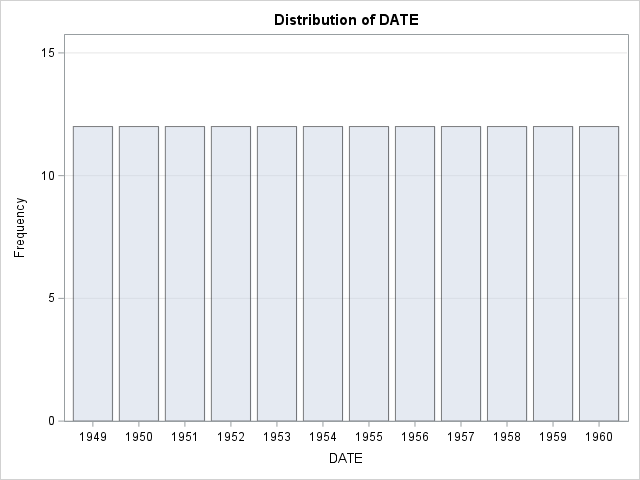

In [14]:
proc freq data=air;
    tables Date /plots=freqplot;
    format Date year4.;
run;


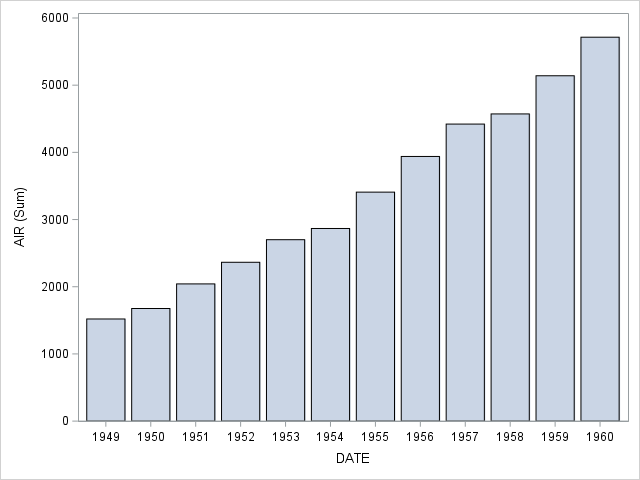

In [11]:
* View the number of passengers by year *;
proc sgplot data=air;
    vbar Date / response=Air;
    format Date year4.;
run;

## Data Prep
Create a final visualization to answer the business question. Which years have a higher than average travelers?

In [15]:
* Set the macro variable for the total mean *;
proc sql;
select int(mean(air)) as Mean
    into :meanAir trimmed
    from sashelp.air;
quit;

%put &=meanAir;

Mean
280


In [16]:
* Summarize data by year *;
proc means data=sashelp.air;
    var Air;
    class Date;
    format Date year4.;
    output out=air(where=(_TYPE_=1)) mean=YearMean;
run;

In [18]:
* Add a status of over/under mean for each year *;
data air_sum;
    set air;
    YearMean=int(YearMean);
    if YearMean > &meanAir then do;
        Status="Above Average";
        LabelValue=YearMean;
    end;
    else do;
        Status="Below Average";
        LabelValue=.;
    end;
run;

proc print data=air_sum noobs;
run;

DATE,_TYPE_,_FREQ_,YearMean,Status,LabelValue
1949,1,12,126,Below Average,.
1950,1,12,139,Below Average,.
1951,1,12,170,Below Average,.
1952,1,12,197,Below Average,.
1953,1,12,225,Below Average,.
1954,1,12,238,Below Average,.
1955,1,12,284,Above Average,284
1956,1,12,328,Above Average,328
1957,1,12,368,Above Average,368
1958,1,12,381,Above Average,381


## Data Visualization

In [19]:
**********************************************;
* SET GRAPH FORMATS                          *;
**********************************************;
* Color of text in graph *;
%let _textColor=gray;

* Color for status *;
%let _vibrant=cx2a9df4;
* other colors: Blue, cx31ddc1 (greenish), cx1c2349 (dark blue) *; 

* Set title formats *;
%let _titleFmt=justify=left color=&_textColor height=14pt;

* Set formats of x and y axes *;
%let _axesFmt= valueattrs=(color=&_textColor size=11pt) 
               labelattrs=(color=&_textColor size=13pt);

45                                                         The SAS System                               14:06 Monday, August 2, 2021

318        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
318      ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
319        
320        **********************************************;
321        * SET GRAPH FORMATS                          *;
322        **********************************************;
323        * Color of text in graph *;
324        %let _textColor=gray;
325        
326        * Color for status *;
327        %let _vibrant=cx2a9df4;
328        * other colors: Blue, cx31ddc1 (greenish), cx1c2349 (dark blue) *;
329        
330        * Set title formats *;
331        %let _titleFmt=justify=left color=&_textColor height=14pt;
332        
333        * Set formats of x and y axes *;
334        %let _axesFmt= valueattrs=(color=

### GRAPH 1 - VBAR        


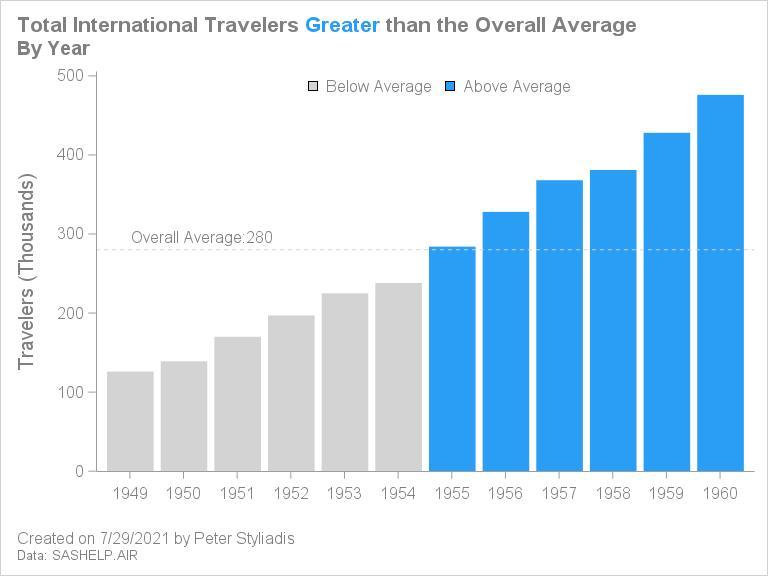

In [33]:
ods listing gpath="&outpath";
ods graphics / width=8in imagename="AirOverMeanbar" imagefmt=jpeg;

title &_titleFmt "Total International Travelers" color=&_vibrant " Greater"
                 color=&_textColor " than the Overall Average";
title2 &_titleFmt height=12pt "By Year";

footnote1 " ";
footnote2 &_titleFmt height=11pt "Created on 7/29/2021 by Peter Styliadis";
footnote3 &_titleFmt height=10pt "Data: SASHELP.AIR";


proc sgplot data=air_sum
            noborder;
vbar Date / response=YearMean 
            group=Status
            nooutline
            baselineattrs=(thickness=0);    *<-----show without this *;
    styleattrs datacolors=(cxd3d3d3 &_vibrant);
    keylegend / location=inside
                position=top
                noborder title=" "
                valueattrs=(size=11pt color=&_textColor);
    refline &meanAir / labelloc=inside
                       labelpos=min
                       label="        Overall Average:&meanAir" 
                       lineattrs=(color=lightgray pattern=shortdash)
                       labelattrs=(size=11pt color=&_textColor);
    xaxis &_axesFmt 
          display=(nolabel);
    yaxis &_axesFmt
          label="Travelers (Thousands)" 
          offsetmin=0;
run;
title;footnote;

ods graphics / reset;

### Graph 2 - Use Series


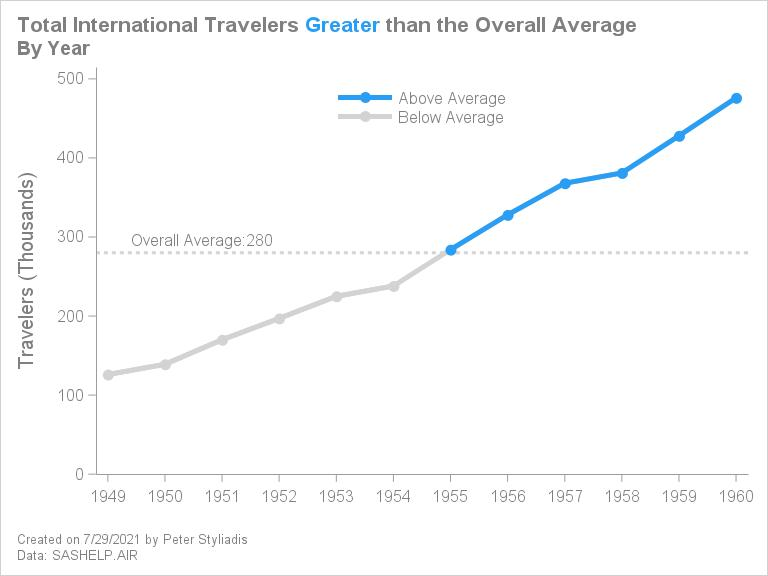

In [34]:
ods listing gpath="&outpath";
ods graphics / width=8in imagename="AirOverMeanSeries" imagefmt=jpeg;

title &_titleFmt "Total International Travelers" color=&_vibrant " Greater"
                 color=&_textColor " than the Overall Average";
title2 &_titleFmt height=12pt "By Year";

footnote1 " ";
footnote2 &_titleFmt height=10pt "Created on 7/29/2021 by Peter Styliadis";
footnote3 &_titleFmt height=10pt "Data: SASHELP.AIR";


proc sgplot data=air_sum
            noborder
            noautolegend;
    refline &meanAir / labelloc=inside
                       labelpos=min
                       label="        Overall Average:&meanAir" 
                       lineattrs=(color=lightgray pattern=shortdash thickness=3)
                       labelattrs=(size=11pt color=&_textColor);
    /*Comment out series*/
    series x=Date y=YearMean / lineattrs=(color=cxd3d3d3 thickness=5);
    series x=Date y=YearMean / group=Status 
                               markers markerattrs=(symbol=circleFilled size=11)
                               lineattrs=(thickness=5 pattern=solid)
                               name="Status";
    styleattrs datacontrastcolors=(&_vibrant cxd3d3d3);
    keylegend "Status"/ 
                across=1
                noborder title=" "
                position=top
                location=inside
                valueattrs=(size=11pt color=&_textColor) sortorder=ascending;
    xaxis &_axesFmt 
          display=(nolabel);
    yaxis &_axesFmt
          label="Travelers (Thousands)" 
          offsetmin=0
          min=0;
run;
title;footnote;

ods graphics / reset;